# <center> Home Credit Default Risk </center>
## <center> XGB model with LIME SHAP interpretation

## Sơ lược về bài toán và bộ dữ liệu

Home Credit cố gắng mở rộng tài chính toàn diện cho những người chưa sử dụng dịch vụ ngân hàng bằng cách cung cấp trải nghiệm vay tích cực và an toàn. Để đảm bảo nhóm dân số chưa được phục vụ này có trải nghiệm vay vốn tích cực, Home Credit sử dụng nhiều loại dữ liệu thay thế - bao gồm thông tin giao dịch và viễn thông - để dự đoán khả năng trả nợ của khách hàng.

- `application_{train|test}.csv`: Bảng dữ liệu chính, dữ liệu về các hồ sơ vay, mỗi hàng biểu diễn một hồ sơ vay 

- `bureau.csv`: Tất cả các khoản tín dụng trước đây của khách hàng được cung cấp bởi các tổ chức tài chính khác đã được báo cáo cho Phòng tín dụng (đối với những khách hàng có khoản vay trong mẫu của chúng tôi). Đối với mỗi khoản vay trong bộ dữ liệu, có nhiều hàng bằng số lượng tín dụng mà khách hàng đã có trong Phòng tín dụng trước ngày nộp đơn.

- `bureau_balance.csv`: Số dư hàng tháng của các khoản tín dụng trước đó trong Phòng tín dụng. Bảng này có một hàng cho mỗi tháng lịch sử của mọi khoản tín dụng trước đó được báo cáo cho Phòng tín dụng – tức là bảng có (# khoản vay trong mẫu * # khoản tín dụng tương đối trước đó * # tháng mà chúng tôi có một số lịch sử có thể quan sát được đối với các khoản tín dụng trước đó) .

- `POS_CASH_balance.csv`: Snapshot số dư hàng tháng của POS (điểm bán hàng) trước đó và các khoản vay tiền mặt mà người nộp đơn đã có với Home Credit. Bảng này có một hàng cho mỗi tháng lịch sử của mọi khoản tín dụng trước đó trong Home Credit (tín dụng tiêu dùng và khoản vay tiền mặt) liên quan đến các khoản vay trong mẫu của chúng tôi – tức là bảng có (# khoản vay trong mẫu * # khoản tín dụng tương đối trước đó * # tháng trong đó chúng tôi có một số lịch sử có thể quan sát được đối với các hàng ghi công trước đó).

- `credit_card_balance.csv`: Snapshot số dư hàng tháng của các thẻ tín dụng trước đây mà người đăng ký có với Home Credit. Bảng này có một hàng cho mỗi tháng lịch sử của mọi khoản tín dụng trước đó trong Home Credit (tín dụng tiêu dùng và khoản vay tiền mặt) liên quan đến các khoản vay trong mẫu của chúng tôi – tức là bảng có (#khoản vay trong mẫu * # thẻ tín dụng tương đối trước đó * # của tháng mà chúng tôi có một số lịch sử có thể quan sát được đối với các hàng thẻ tín dụng trước đó).

- `previous_application.csv`: Tất cả các đơn đăng ký vay Home Credit trước đây của các khách hàng. Có một hàng cho mỗi application trước đây liên quan đến các khoản vay.

- `installments_payments.csv`: Lịch sử trả nợ cho các khoản tín dụng đã giải ngân trước đó trong Home Credit liên quan đến các khoản vay.
  
  Có a) một hàng cho mỗi khoản thanh toán đã được thực hiện (payment) cộng với b) một hàng cho mỗi khoản thanh toán bị bỏ lỡ (missed payement).

  Một hàng tương đương với một lần thanh toán (payment) của một khoản trả góp HOẶC một lần trả góp tương ứng với một lần thanh toán một khoản tín dụng Home Credit trước đó liên quan đến các khoản vay.


**Trong phạm vi của bài, vì giới hạn của công cụ sử dụng (RAM colab), em đề xuất 3 tập dữ liệu quan trọng đối với bài toán tín dụng là `application_train.csv`, `bureau.csv`, `bureau_balance.csv` sẽ được sử dụng để phân tích**

## Mục tiêu
Dự đoán xác suất khách hàng không trả lại số dư thẻ tín dụng của họ trong tương lai dựa trên hồ sơ khách hàng hàng tháng của họ. Biến nhị phân ‘TARGET’ được tính bằng cách quan sát thời hạn hoạt động sau một khoảng thời gian nhất định `a` sau bảng sao kê thẻ tín dụng mới nhất và nếu khách hàng không thanh toán số tiền đến hạn trong `b` ngày sau ngày sao kê gần nhất của họ thì đó được coi là nợ xấu (default).

## **Kết nối drive và load thư viện**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/GoogleDrive', force_remount=True)
path = '/content/GoogleDrive/My Drive/HCMUT/HK221/IS/assignment'
os.chdir(path)
!ls

Mounted at /content/GoogleDrive
 all_feature_model_joblib.joblib
 all_feature_model_joblib.sav
 all_feature_model.json
 all_feature_model.model
 all_feature_model.sav
 application_test.csv
 application_train.csv
 archive.ics.uci.edu
'Bản sao của HomeCredit Default Prediction - XGB model with LIME SHAP interpretation.ipynb'
 bureau_balance.csv
 bureau.csv
 full_model_09122022_1.bin
 full_model_09122022_2.bin
 HomeCredit_columns_description.gsheet
'HomeCredit Default Prediction - XGB model with LIME SHAP interpretation.ipynb'
 homecredit_default_risk.ipynb
 merged_df.csv
 merged_df.csv.gz
 shap_explainer.bin
 shap_explainer.sav
 test_model.bin
 train_df.csv
 Untitled0.ipynb


In [ ]:
!pip install -q shap
import numpy as np
import pandas as pd
import shap
import gc
import time

import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import contextmanager
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Sử dụng XGBoost cho phần mô hình, đánh giá điểm dựa trên roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from xgboost import XGBClassifier

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

     |████████████████████████████████| 575 kB 3.9 MB/s 


In [ ]:
# Kiểm tra version
import xgboost as _xgb
_xgb.__version__

'0.90'

In [ ]:
!python --version

Python 3.8.15


In [ ]:
import sklearn as sk
sk.__version__

'1.0.2'

In [ ]:
!pip install -U scikit-learn

## **Tiền xử lý dữ liệu**

### Tổng quan dữ liệu

In [ ]:
# Hiển thị phân phối của các trường dữ liệu phân loại
def visualize_category_data(train_df, cat_cols):
  plt.figure(figsize=(16, 24))
  for i, f in enumerate(cat_cols):
      plt.subplot(6, 3, i+1)
      temp = pd.DataFrame(train_df[f][train_df.TARGET == 0].value_counts(dropna=False, \
                                          normalize=True).sort_index().rename('count'))
      temp.index.name = 'value'
      temp.reset_index(inplace=True)
      plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0', color='#6193d5')
      temp = pd.DataFrame(train_df[f][train_df.TARGET == 1].value_counts(dropna=False, \
                                          normalize=True).sort_index().rename('count'))
      temp.index.name = 'value'
      temp.reset_index(inplace=True)
      plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
      plt.xlabel(f)
      plt.ylabel('frequency')
      plt.legend()
      plt.xticks(temp.index, "")
  plt.suptitle('Categorical features', fontsize=20, y=0.93)
  plt.show()
  del temp

In [ ]:
# Hiển thị phân phối của các trường dữ liệu số
def visualize_numerical_data(train_df, cat_cols, label, no_num_cols):
  cols=[col for col in train_df.columns if col not in cat_cols and col not in ['customer_ID', 'S_2']]
  plot_df=train_df[cols]
  fig, ax = plt.subplots(22,5, figsize=(16,108))
  fig.suptitle('Distribution of Numerical Variables',fontsize=16)
  row=0
  col=[0,1,2,3,4]*22
  for i, column in enumerate(plot_df.columns[:-1]):
      if (i!=0)&(i%5==0):
          row+=1
      sns.kdeplot(x=column, hue=label, palette=['#6193d5', '#58abbf'], hue_order=[1,0], 
                  label=['Default','Paid'], data=plot_df, 
                  fill=True, linewidth=2, legend=False, ax=ax[row,col[i]], warn_singular=False)
      ax[row,col[i]].tick_params(left=False,bottom=False)
      ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Density' if i%5==0 else ''))
  for i in range(2,5):
      ax[17,i].set_visible(False)
  handles, _ = ax[0,0].get_legend_handles_labels() 
  fig.legend(labels=['Default','Paid'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.983))
  sns.despine(bottom=True, trim=True)
  plt.tight_layout(rect=[0, 0.2, 1, 0.99])

In [ ]:
application_df = pd.read_csv('application_train.csv')
bereau_df = pd.read_csv("bureau.csv")
bereau_balance_df = pd.read_csv("bureau_balance.csv")

print("Application shape: ", application_df.shape)
print("Bereau shape: ", bereau_df.shape)
print("Bereau_balance shape: ", bereau_balance_df.shape)

Application shape:  (307511, 122)
Bereau shape:  (1716428, 17)
Bereau_balance shape:  (27299925, 3)


### Dữ liệu khuyết

In [ ]:
def check_missing(df):
  missing_ratio=round((df.isna().sum()/df.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
  missing_ratio=missing_ratio.to_frame().rename(columns={0:'Missing %'})
  print(missing_ratio.head(5))

In [ ]:
check_missing(application_df)

                         Missing %
COMMONAREA_MEDI             69.87%
COMMONAREA_AVG              69.87%
COMMONAREA_MODE             69.87%
NONLIVINGAPARTMENTS_MODE    69.43%
NONLIVINGAPARTMENTS_AVG     69.43%


In [ ]:
check_missing(bereau_df)

                       Missing %
AMT_ANNUITY               71.47%
AMT_CREDIT_MAX_OVERDUE    65.51%
DAYS_ENDDATE_FACT         36.92%
AMT_CREDIT_SUM_LIMIT      34.48%
AMT_CREDIT_SUM_DEBT       15.01%


In [ ]:
check_missing(bereau_balance_df)

               Missing %
SK_ID_BUREAU        0.0%
MONTHS_BALANCE      0.0%
STATUS              0.0%


**Nhận xét**

* Có nhiều trường thông tin bị trống: Loại bỏ tất cả các cột có giá trị bị thiếu không phải là một chiến lược hợp lý.

* Nhiều thuật toán dựa trên cây quyết định có thể xử lý các giá trị bị thiếu. Nếu chọn mô hình như vậy thì chúng ta không cần thay đổi các giá trị còn thiếu.

* Mạng thần kinh và các công cụ ước tính khác không thể xử lý các giá trị bị thiếu. Nếu chúng ta chọn một mô hình như vậy, chúng ta cần áp đặt các giá trị. Xem hướng dẫn này để biết tổng quan về nhiều tùy chọn quy nạp.

### Phân phối của dữ liệu

Số lượng cat col:  16
Số lượng num col:  106


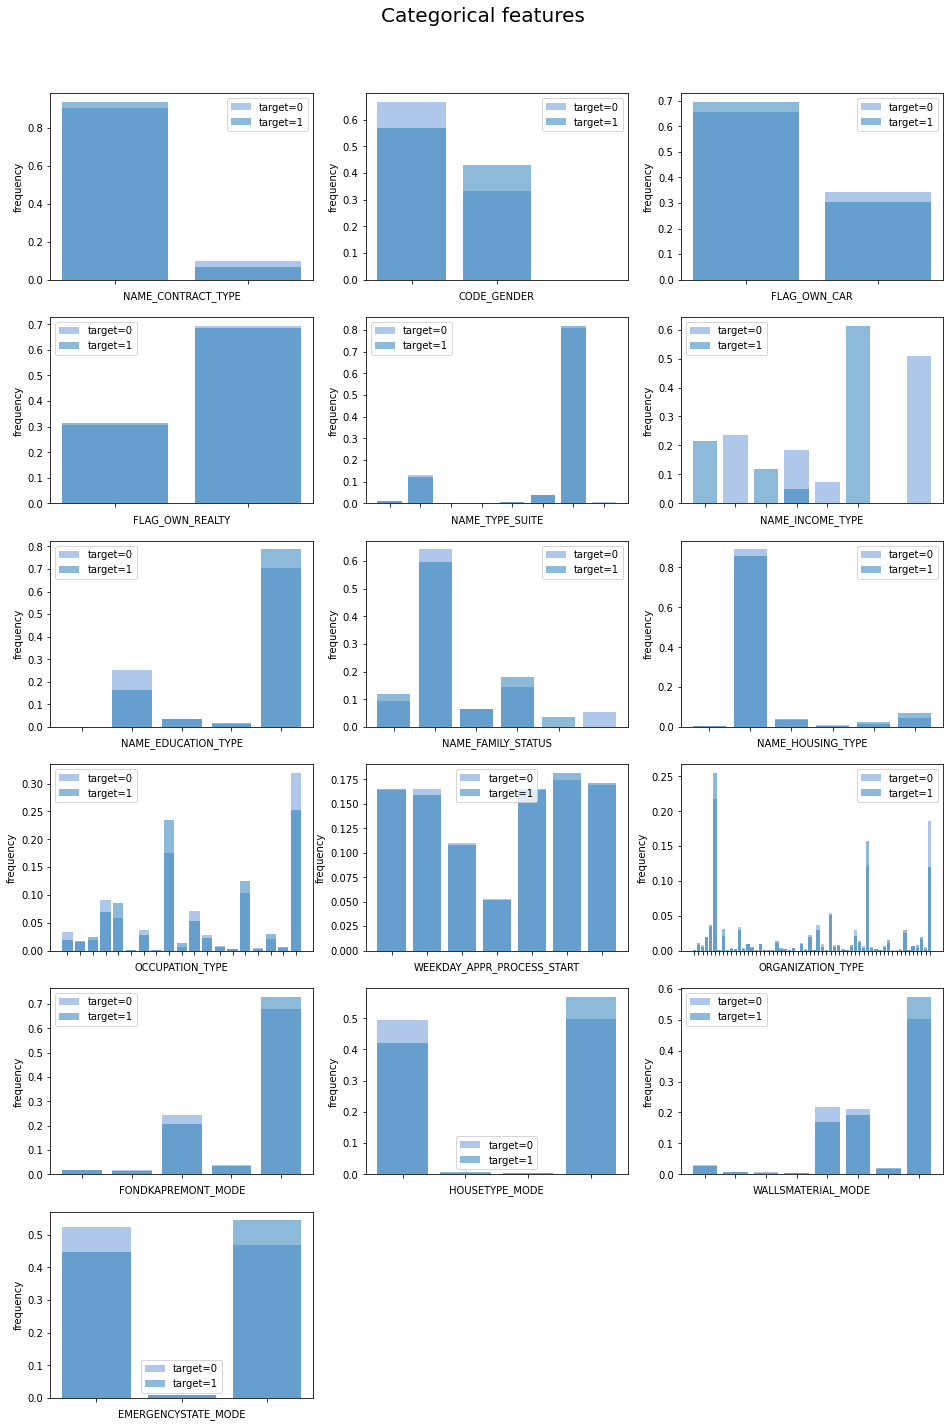

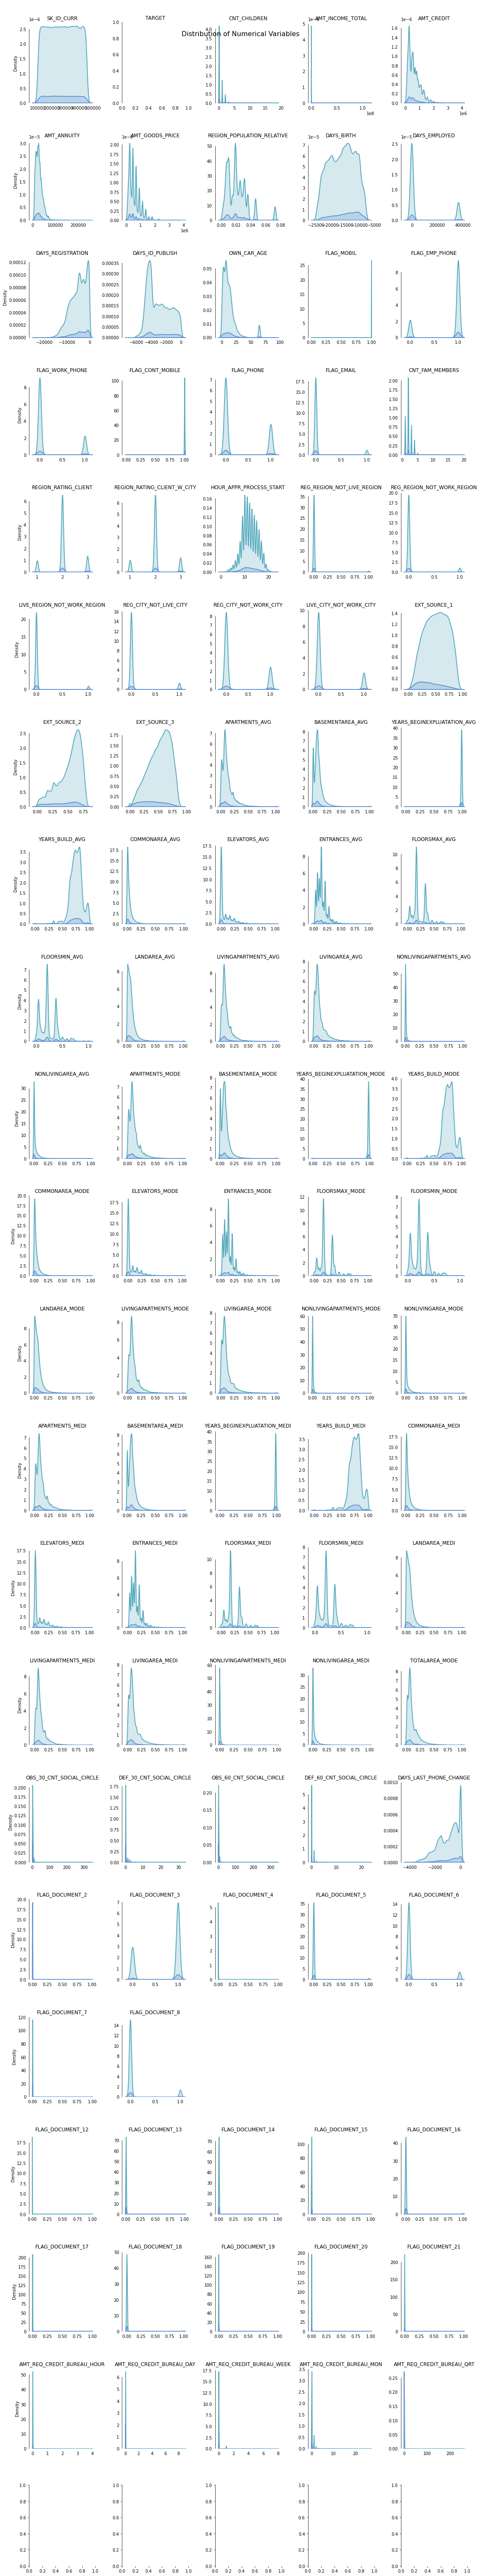

In [ ]:
app_cat_cols = [col for col in application_df.columns if application_df[col].dtype == 'object']
app_num_cols = [col for col in application_df.columns if application_df[col].dtype != 'object']
print("Số lượng cat col: ", len(app_cat_cols))
print("Số lượng num col: ", len(app_num_cols))
visualize_category_data(application_df, app_cat_cols)
visualize_numerical_data(application_df, app_cat_cols, label = "TARGET")
# cols=[col for col in application_df.columns if col not in app_cat_cols and col not in ['customer_ID', 'S_2']]
# plot_df=application_df[cols]
# fig, ax = plt.subplots(22,5, figsize=(16,108))
# fig.suptitle('Distribution of Numerical Variables',fontsize=16)
# row=0
# col=[0,1,2,3,4]*36
# for i, column in enumerate(plot_df.columns[:-1]):
#     if (i!=0)&(i%5==0):
#         row+=1
#     sns.kdeplot(x=column, hue="TARGET", palette=['#6193d5', '#58abbf'], hue_order=[1,0], 
#                 label=['Default','Paid'], data=plot_df, 
#                 fill=True, linewidth=2, legend=False, ax=ax[row,col[i]], warn_singular=False)
#     ax[row,col[i]].tick_params(left=False,bottom=False)
#     ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Density' if i%5==0 else ''))
# for i in range(2,5):
#     ax[17,i].set_visible(False)
# handles, _ = ax[0,0].get_legend_handles_labels() 
# fig.legend(labels=['Default','Paid'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.983))
# sns.despine(bottom=True, trim=True)
# plt.tight_layout(rect=[0, 0.2, 1, 0.99])

### Xử lý dữ liệu

In [ ]:
# Sử dụng get_dummies để mã hóa one-hot cho các trường phân loại
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Xử lý application_train.csv và application_test.csv
def application_preprocessing(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('application_train.csv', nrows= num_rows)
    print("Train samples: {}".format(len(df)))
    
    # Thay thế giá trị outlier DAYS_EMPLOYED: 365.243 thành nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

    df['APP_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['APP_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['APP_INC_PER_CHLD'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
    df['APP_EMPLOY_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['APP_EMPLOY_TO_BIRTH-18_RATIO'] = df['DAYS_EMPLOYED'] / (df['DAYS_BIRTH'] + 18*365)
    df['APP_BIRTH_TO_EMPLOY_RATIO'] = df['DAYS_BIRTH'] / (1 + df['DAYS_EMPLOYED'])
    df['APP_INCOME_TO_ANNUITY_RATIO'] = df['AMT_INCOME_TOTAL'] / (1 + df['AMT_ANNUITY'])
    df['APP_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
    df['APP_EXT_SOURCES_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)
    df['APP_EXT_SOURCES_MAX'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max(axis=1, skipna=True)
    df['APP_EXT_SOURCES_MIN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min(axis=1, skipna=True)
    df['APP_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['APP_CAR_TO_EMPLOY_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['APP_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    df['APP_PHONE_TO_EMPLOYED_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['APP_CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['APP_PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    df['APP_INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['APP_INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    # Thuộc tính phân loại với Binary (0 or 1)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])

    # Áp dụng one-hot encoder cho thuộc tính phân loại
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    gc.collect()
    return df

# Tiền xử lý dữ liệu bureau.csv và bureau_balance.csv
def bureau_balance_preprocessing(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('bureau.csv', nrows = num_rows)
    bb = pd.read_csv('bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': [ 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': [ 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Xử lý categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    
    # Xử lý active credits
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    
    # Xử lý closed credits
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [ ]:
%%time
debug = False
num_rows = 10000 if debug else None
scores = {}

df = application_preprocessing(num_rows)
with timer("Process bureau and bureau_balance"):
    bureau = bureau_balance_preprocessing(num_rows)
    print("Bureau df shape:", bureau.shape)
    df = df.join(bureau, how='left', on='SK_ID_CURR')
    del bureau
    gc.collect()
    
with timer("Save df"):
    df.to_csv('merged_df.csv.gz', compression='gzip', index=False)
with timer("Divide in training and test data"):
    feats = [f for f in df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    train_df = df[df['TARGET'].notnull()][feats]
    train_target = df[df['TARGET'].notnull()]['TARGET']
    test_df = df[df['TARGET'].isnull()][feats]
    del df
    gc.collect()

Train samples: 307511
Bureau df shape: (305811, 95)
Process bureau and bureau_balance - done in 23s
Save df - done in 125s
Divide in training and test data - done in 1s
CPU times: user 2min 16s, sys: 2.08 s, total: 2min 18s
Wall time: 2min 34s


## **Hàm hiện thực XGBoost**

In [ ]:
# Train và validate mô hình XGBoost sử dụng KFold or Stratified KFold
def kfold_xgb(train_df, train_target, num_folds, stratified=False, debug=False):
    print("Starting XGBoost. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)
    
    # Tạo arrays and dataframes để lưu các kết quả
    train_pred = np.zeros(train_df.shape[0])
    feat_importance = pd.DataFrame()
    scores = []
    models = []
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, train_target)):
        train_x, train_y = train_df.iloc[train_idx], train_target.iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], train_target.iloc[valid_idx]

        # Tham số cho XGBClassifier
        clf = XGBClassifier(
            objective = "binary:logistic",
            booster = "gbtree",
            nthread = 4,
            eta = 0.05,
            max_depth = 6,
            min_child_weight = 30,
            gamma = 0,
            subsample = 0.85,
            colsample_bytree = 0.7,
            colsample_bylevel = 0.632,
            alpha = 0,
            nrounds = 2000
            )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 300)

        train_pred[valid_idx] = clf.predict_proba(valid_x)[:, 1]

        ## feature importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = test_df.columns.values
        fold_importance_df["importance"] = pd.Series(clf.feature_importances_)
        fold_importance_df["shap_values"] = pd.Series(abs(shap.TreeExplainer(clf).shap_values(valid_x)[:,:test_df.shape[1]]).mean(axis=0).T)
        fold_importance_df["fold"] = n_fold + 1
        feat_importance = pd.concat([feat_importance, fold_importance_df], axis=0)
        
        scores.append(roc_auc_score(valid_y, train_pred[valid_idx]))
        print('Fold %2d AUC : %.6f' % (n_fold + 1, scores[n_fold]))
        models.append(clf)
        del clf, train_x, train_y, valid_x, valid_y, fold_importance_df
        gc.collect()

    score = roc_auc_score(train_target, train_pred)
    print('Full AUC score %.6f' % score)
    print('Mean AUC score %.6f' % np.mean(scores))
    
    # Feature importance
    display_importances(feat_importance)
    display_shapley_values(feat_importance)
    return feat_importance, models, scores

def display_importances(feat_importance):
    best_features = feat_importance[["feature", "importance"]].groupby("feature")["importance"].agg(['mean', 'std']) \
                                                              .sort_values(by="mean", ascending=False).head(40).reset_index()
    best_features.columns = ["feature", "mean importance", "err"]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="mean importance", y="feature", xerr=best_features['err'], data=best_features)
    plt.title('XGboost Features (avg over folds)')
    plt.tight_layout()
    plt.show()

# Display/plot shapley values
def display_shapley_values(feat_importance):
    best_features = feat_importance[["feature", "shap_values"]].groupby("feature")["shap_values"].agg(['mean', 'std']) \
                                                               .sort_values(by="mean", ascending=False).head(40).reset_index()
    best_features.columns = ["feature", "mean shapley values", "err"]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="mean shapley values", y="feature", xerr=best_features['err'], data=best_features)
    plt.title('XGboost shapley values (avg over folds)')
    plt.tight_layout()
    plt.show()


## **Mô hình với toàn bộ features**

### **Training mô hình và vẽ feature importance**

Starting XGBoost. Train shape: (307511, 354), test shape: (0, 354)
[0]	validation_0-auc:0.720198	validation_1-auc:0.716795
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[99]	validation_0-auc:0.806252	validation_1-auc:0.770741
Fold  1 AUC : 0.770837
[0]	validation_0-auc:0.721726	validation_1-auc:0.712957
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[99]	validation_0-auc:0.807534	validation_1-auc:0.766454
Fold  2 AUC : 0.766454
[0]	validation_0-auc:0.721032	validation_1-auc:0.702699
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 300 rounds.
[99]	validation_0-auc:0.808465	validation_1-auc:0.769049
Fold  3 AUC : 0.769049
[0]	validation_0-auc:0.721483	validation_1-auc:0.71

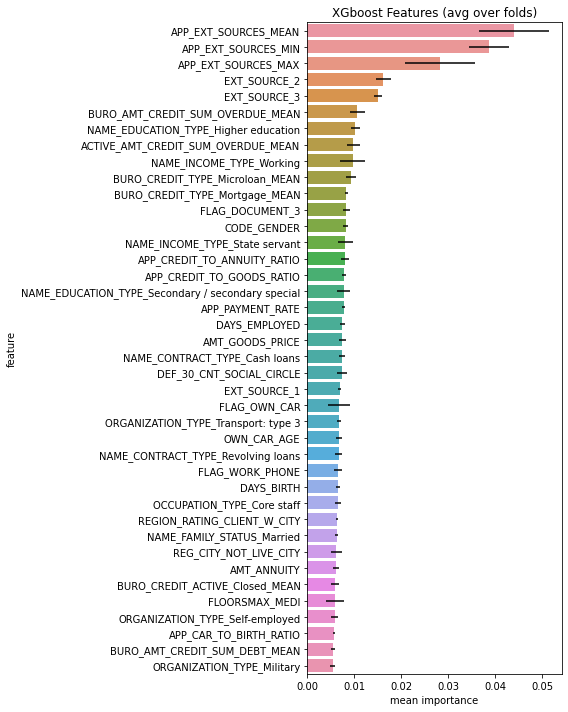

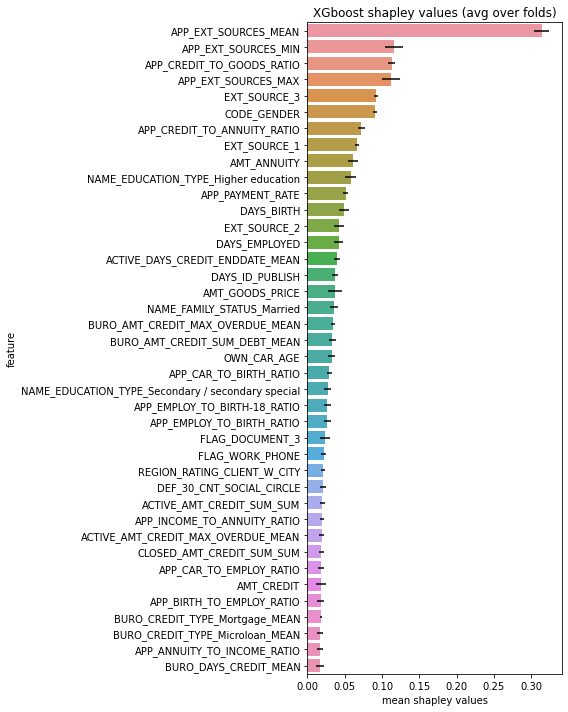

CPU times: user 45min 7s, sys: 5.61 s, total: 45min 13s
Wall time: 11min 50s


In [ ]:
%%time

feat_importance, models, scores = kfold_xgb(train_df, train_target, num_folds=5, stratified=False, debug=debug)

### **Lưu mô hình**

In [ ]:
import pickle
filename = 'all_feature_model.sav'
pickle.dump(models[0], open(filename, 'wb'))

In [ ]:
import pickle
filename = "all_feature_model.sav"
all_feature_model = pickle.load(open(filename, 'rb'))

### **Giải thích kết quả mô hình**

#### **LIME (Local Interpretable Model-Agnostic)**

LIME được dùng để giải thích lý do tại sao nó đưa ra một quyết định cụ thể cho một quan sát nhất định. Để làm như vậy, LIME tạo một tập dữ liệu locl quan sát bằng cách làm xáo trộn các tính năng khác nhau. Sau đó, nó khớp với một mô hình tuyến tính cục bộ trên dữ liệu này và sử dụng các trọng số trên từng tính năng để đưa ra lời giải thích.

In [ ]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """
    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    return X_lime

**Import LIME library và tạo đối tượng tabular explainer. Các tham số:**

- `training data`: dữ liệu training dựa trên tập train / test (yêu cầu định dạng Numpy array
- `feature_names`: tên các cột trong tập train dataset
- `class_names`: các lớp phân biệt của biến mục tiêu
- `mode`:  loại vấn đề đang giải quyết (trong trường hợp của bài toán là *classification*

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(convert_to_lime_format(train_df.iloc[0:10000], []).values,
                                 mode="classification",
                                 feature_names=train_df.columns.tolist(),
                                 discretize_continuous=True,
                                 random_state=42)

In [ ]:
i = 1
X_observation_lime = train_df.iloc[[i], :]
X_observation_lime.shape

(1, 354)

In [ ]:
print(f"""\
* True label: {train_target.iloc[i]}
* XGB: {models[0].predict_proba(X_observation_lime)[0]}""")

* True label: 0
* XGB: [0.96576846 0.03423156]


In [ ]:
observation_lime = train_df.iloc[[i], :].values[0]

In [ ]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, [], col_names=train_df.columns, invert=True)
    return model.predict_proba(X_str)

In [ ]:
xgb_predict_proba = partial(custom_predict_proba, model=models[0])

**Hàm explain_instance của explainer để giải thích dự đoán:**
- `data_row`: một quan sát trong tập dữ liệu
- `predict_fn`: một hàm để thực hiện dự đoán. `predict_proba` trong model thường được sử dụng để biểu diễn xác suất

In [ ]:
explanation_lime = explainer_lime.explain_instance(observation_lime, xgb_predict_proba, num_features=5)

In [ ]:
explanation_lime.show_in_notebook(show_table=True, show_all=False)

**Nhận xét**
- Mô hình 96% tự tin rằng người được chọn không mang rủi ro tín dụng
- Các giá trị `NAME_EDUCATION_TYPE_Higher education`, `CODE_GENDER`, `NAME_FAMILY_STATUS_Married`, `NAME_EDUCATION_TYPE_Secondary / secondary special` làm tăng cơ hội để mô hình dự đoán đây là một trường hợp rủi ro tín dụng. Điều này có thể giải thích là những người đang học trung học chưa thể tự chủ về mặt tài chính
- Giá trị `AMT_ANNUITY` (tiền trả hàng năm) làm tăng khả năng đây là trường hợp khách hàng tốt, do có lịch sử trả nợ tín dụng, có khả năng trả cho một khoản vay có giá trị cao

#### **Using SHAP (SHapley Additive exPlanations)**

SHAP có một chút khác biệt so với LIME. SHAP giải thích mô hình dựa trên *Shapley values* - đo mức độ đóng góp của mỗi feature trong mô hình

Import library, tạo mẫu, tính toán shapley value

In [ ]:
explainer_shap = shap.TreeExplainer(all_feature_model, num_iteration=all_feature_model.get_booster().best_ntree_limit)
shap_values = explainer_shap.shap_values(train_df[0:2])

In [ ]:
# nạp JS visualization code vào notebook
shap.initjs()

# visualize giải thích cho record đầu tiên trong dữ liệu (in log-odds scale)
print('Model prediction:', all_feature_model.predict_proba(train_df[1:2])[:,1])
shap.force_plot(explainer_shap.expected_value, shap_values[1,:], train_df.iloc[1,:])

Model prediction: [0.04533066]


In [ ]:
# Xây dựng lại đầu ra xgb từ shap_values:
def inv_logit(p): return np.exp(p) / (1 + np.exp(p))
base_value = shap_values[0,-1]  ## phiên bản cũ này của shap sử dụng chỉ mục cuối cùng để lưu trữ giá trị cơ sở
output = base_value + np.sum(shap_values[0,:-1])  ## các chỉ mục còn lại là đóng góp tuyến tính/phụ gia của từng tính năng

print('Log-odds output:', output, ' Logistic output:', inv_logit(output))

Log-odds output: 2.0165596  Logistic output: 0.8825247999229212


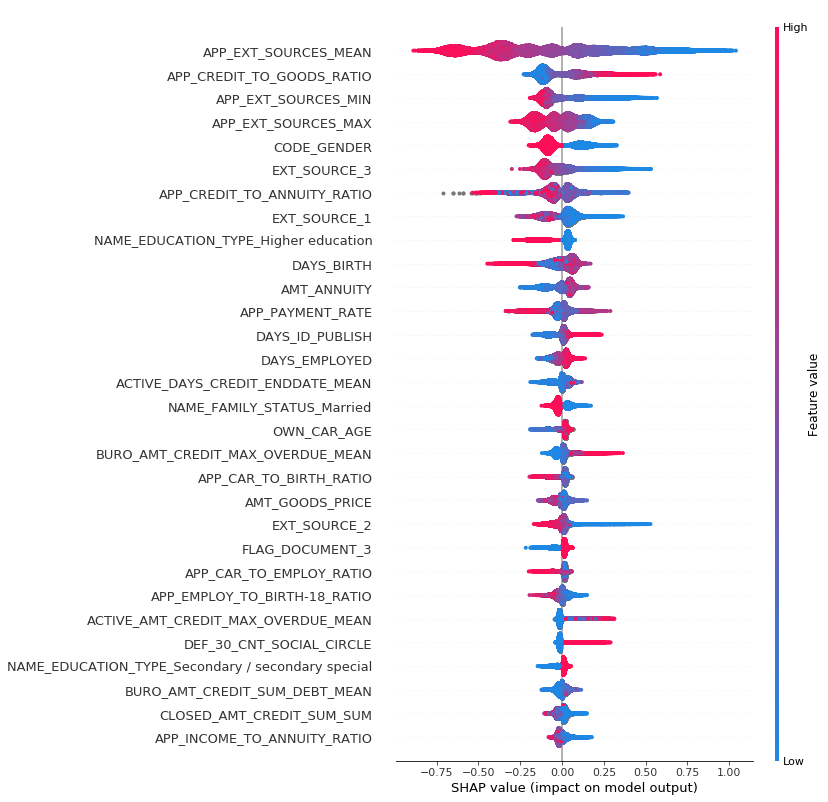

In [ ]:
# tóm tắt tác dụng của các tính năng hàng đầu
shap.summary_plot(shap_values, train_df, max_display=30)

## Chạy mô hình với TOP features

### Chọn TOP features và training mô hình

## Using 53 features = ['APP_EXT_SOURCES_MEAN' 'APP_EXT_SOURCES_MIN' 'APP_CREDIT_TO_GOODS_RATIO'
 'APP_EXT_SOURCES_MAX' 'CODE_GENDER' 'EXT_SOURCE_3'
 'APP_CREDIT_TO_ANNUITY_RATIO' 'AMT_ANNUITY' 'EXT_SOURCE_1'
 'NAME_EDUCATION_TYPE_Higher education' 'DAYS_BIRTH' 'APP_PAYMENT_RATE'
 'EXT_SOURCE_2' 'ACTIVE_DAYS_CREDIT_ENDDATE_MEAN' 'DAYS_ID_PUBLISH'
 'AMT_GOODS_PRICE' 'NAME_FAMILY_STATUS_Married' 'OWN_CAR_AGE'
 'DAYS_EMPLOYED' 'APP_EMPLOY_TO_BIRTH-18_RATIO' 'APP_CAR_TO_BIRTH_RATIO'
 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN' 'BURO_AMT_CREDIT_SUM_DEBT_MEAN'
 'NAME_EDUCATION_TYPE_Secondary / secondary special'
 'APP_EMPLOY_TO_BIRTH_RATIO' 'FLAG_DOCUMENT_3' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'REGION_RATING_CLIENT_W_CITY' 'FLAG_WORK_PHONE'
 'APP_INCOME_TO_ANNUITY_RATIO' 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN'
 'APP_BIRTH_TO_EMPLOY_RATIO' 'CLOSED_AMT_CREDIT_SUM_SUM'
 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN' 'BURO_AMT_CREDIT_SUM_MEAN'
 'BURO_CREDIT_TYPE_Mortgage_MEAN' 'ACTIVE_AMT_CREDIT_SUM_SUM'
 'NAME_INCOME_TYPE_Work

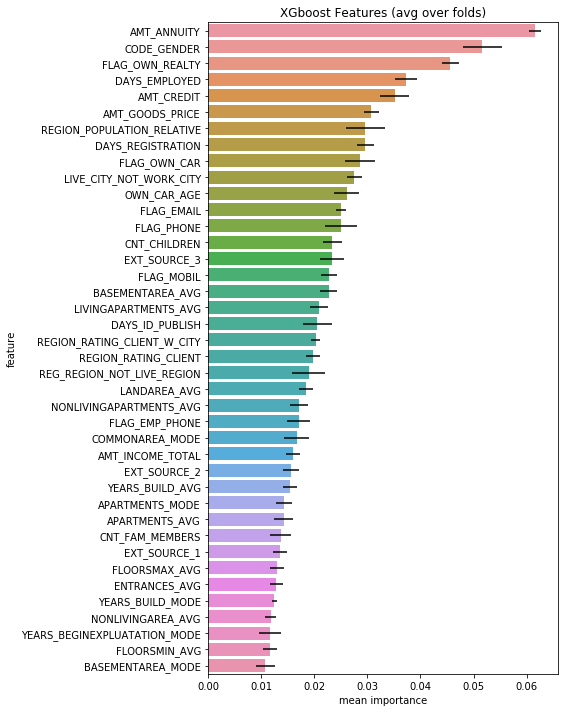

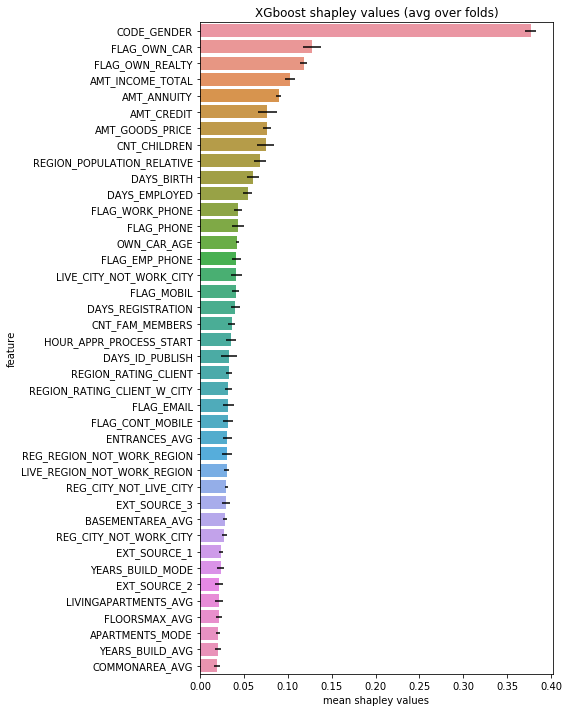

Run XGBoost with kfold - done in 348s


In [ ]:
percentile = 0.15 ## tweak me
best_features = feat_importance[["feature", "shap_values"]].groupby("feature")["shap_values"].agg(['mean']) \
                                                           .sort_values(by="mean", ascending=False).reset_index()
best_features = best_features[:int(best_features.shape[0]*percentile)]["feature"].values
print("## Using {} features =".format(len(best_features)), best_features)
with timer("Run XGBoost with kfold"):
    train_df = train_df[best_features]

    feat_importance, models, scores = kfold_xgb(train_df, train_target, num_folds=5, stratified=False, debug=debug)

In [ ]:
import pickle
filename = 'reduce_feature_model.sav'
pickle.dump(models[0], open(filename, 'wb'))

In [ ]:
filename = 'reduce_feature_model.sav'
reduce_feature_model = pickle.load(open(filename, 'rb'))

### Giải thích kết quả mô hình

#### LIME (Local Interpretable Model-Agnostic)

In [ ]:
import lime
explainer_lime = LimeTabularExplainer(train_df.iloc[0:10000, :].values,
                                 mode="classification",
                                 feature_names=train_df.columns.tolist(),
                                 discretize_continuous=True,
                                 random_state=42)

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
i = 2
X_observation_lime = train_df.iloc[[i], :]
X_observation_lime.shape

(1, 53)

In [ ]:
print(f"""\
* True label: {train_target.iloc[i]}
* XGB: {reduce_feature_model.predict_proba(X_observation_lime)[0]}""")

* True label: 0
* XGB: [0.9576391  0.04236091]


In [ ]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """Converts data with categorical values as string into the right format 
    for LIME, with categorical values as integers labels.

    It takes categorical_names, the same dictionary that has to be passed
    to LIME to ensure consistency. 

    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    return X_lime

In [ ]:
observation_lime = train_df.iloc[[i], :].values[0]

In [ ]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, [], col_names=train_df.columns, invert=True)
    return model.predict_proba(X_str)

In [ ]:
xgb_predict_proba = partial(custom_predict_proba, model=reduce_feature_model)

In [ ]:
explanation_lime = explainer_lime.explain_instance(observation_lime, xgb_predict_proba, num_features=5)

In [ ]:
explanation_lime.show_in_notebook(show_table=True, show_all=False)

#### SHAP (SHapley Additive exPlanations)

In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer_shap = shap.TreeExplainer(reduce_feature_model, num_iteration=reduce_feature_model.get_booster().best_ntree_limit)
shap_values = explainer_shap.shap_values(train_df)

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explanation (in log-odds scale)
print('Model prediction:', reduce_feature_model.predict_proba(train_df[:1])[:,1])
shap.force_plot(explainer_shap.expected_value, shap_values[0,:], train_df.iloc[0,:])

Model prediction: [0.42670447]


In [ ]:
# Reconstructing the lgb output from shap_values:
def inv_logit(p): return np.exp(p) / (1 + np.exp(p))
base_value = shap_values[0,-1]  ## this old version of shap uses the last index to store the base value
output = base_value + np.sum(shap_values[0,:-1])  ## the remaining indexes are the the linear/additive contributions of each feature

print('Log-odds output:', output, ' Logistic output:', inv_logit(output))

Log-odds output: 2.1987696  Logistic output: 0.9001389667698759


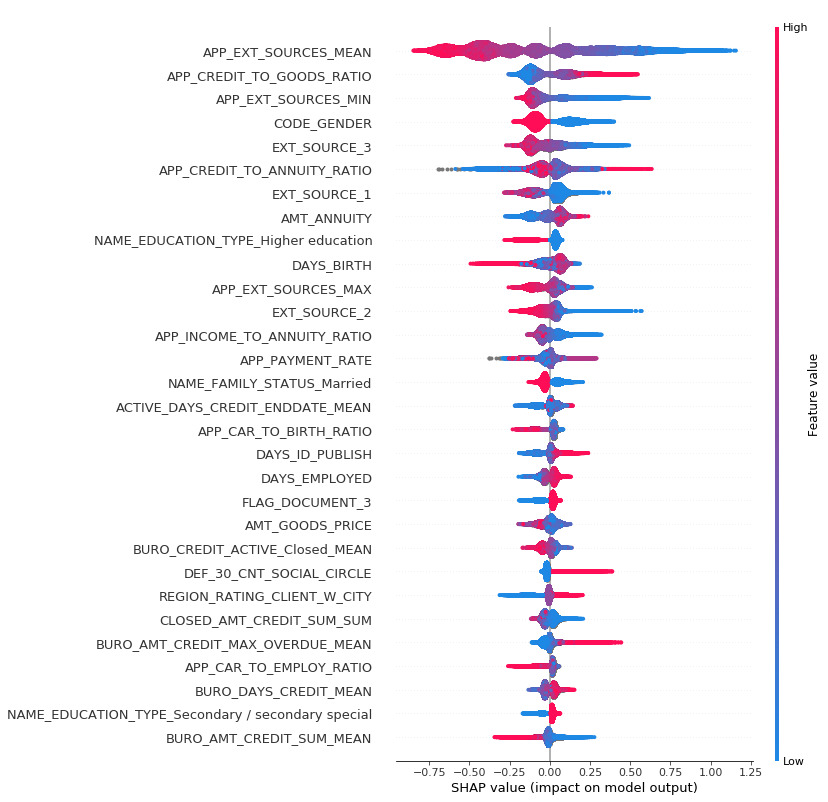

In [ ]:
# summarize the effects of top features
shap.summary_plot(shap_values, train_df, max_display=30)